# Self-Organising Maps

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import patches as patches
import matplotlib.lines as mlines

# reading data
data = pd.read_csv("cash-crops-nepal.csv")
# visualize some data
data.iloc[:10,:]

,Year AD,Year BS,Crop,Area,Production,Yield
0,1984/85,2041/42,OILSEED,127820,84030,657
1,1985/86,2042/43,OILSEED,137920,78390,568
2,1986/87,2043/44,OILSEED,142890,82500,577
3,1987/88,2044/45,OILSEED,151490,94370,623
4,1988/89,2045/46,OILSEED,154860,99190,641
5,1989/90,2046/47,OILSEED,153660,98060,638
6,1990/91,2047/48,OILSEED,156310,92140,589
7,1991/92,2048/49,OILSEED,154570,87840,568
8,1992/93,2049/50,OILSEED,165240,93690,567
9,1993/94,2050/51,OILSEED,177486,107535,606


In [2]:
data.shape

(105, 6)

In [3]:
# What are the different crops
print(data.iloc[:,2].unique())

['OILSEED' 'POTATO' 'TOBACCO' 'SUGARCANE' 'JUTE']


We will not use "Crop" labels for training SOM. But we will use it to check if the clustering by SOM worked fine or not. We will also drop the “Year AD” and “Year BS” columns.

In [4]:
# shuffling data
agri_data = data.iloc[np.random.permutation(len(data))]
trunc_data = agri_data[["Area", "Production", "Yield"]]
trunc_data.iloc[:10,:]

,Area,Production,Yield
0,127820,84030,657
37,129019,1313717,10182
97,12265,15545,1267
80,59477,2247990,37796
8,165240,93690,567
86,19840,23452,1182
88,13554,17624,1300
62,3003,3016,1004
75,46360,1629300,35145
7,154570,87840,568


In [5]:
# (custom choice for) normalizing data
trunc_data = trunc_data / trunc_data.max()
trunc_data.iloc[:10,:]

,Area,Production,Yield
0,0.671221,0.035365,0.016336
37,0.677518,0.552887,0.253177
97,0.064407,0.006542,0.031504
80,0.312332,0.946083,0.939802
8,0.867725,0.039430,0.014099
86,0.104186,0.009870,0.029391
88,0.071176,0.007417,0.032325
62,0.015770,0.001269,0.024965
75,0.243450,0.685703,0.873884
7,0.811694,0.036968,0.014123


## Training SOM

Now let’s train the data in a 3 x 3 SOM network using 3 input features. 

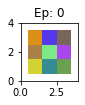

In [6]:
from our_som1 import SOM

# som = SOM(x_size, y_size, num_features)
agri_som = SOM(3,3,3)

# Initial weights
init_fig = plt.figure()
agri_som.show_plot(init_fig, 1, 0)
plt.show()

Random weights (3 features) are given to each of 9 (3×3) neurons. The above figure shows how the neural network looks like in the beginning.

c:\Users\iCETEE\Documents\GitHub\TMBD-Project-3\our_som1.py:151: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  ax = fig.add_subplot(2, 5, position, aspect="equal")


SOM training epoches 20
neighborhood radius  2.6878753795222865
learning rate  0.009048374180359595
-------------------------------------
SOM training epoches 40
neighborhood radius  2.4082246852806923
learning rate  0.008187307530779819
-------------------------------------
SOM training epoches 60
neighborhood radius  2.157669279974593
learning rate  0.007408182206817179
-------------------------------------
SOM training epoches 80
neighborhood radius  1.9331820449317627
learning rate  0.006703200460356393
-------------------------------------
SOM training epoches 100
neighborhood radius  1.7320508075688772
learning rate  0.006065306597126334
-------------------------------------
SOM training epoches 120
neighborhood radius  1.5518455739153598
learning rate  0.005488116360940265
-------------------------------------
SOM training epoches 140
neighborhood radius  1.3903891703159093
learning rate  0.004965853037914096
-------------------------------------
SOM training epoches 160
neighbo

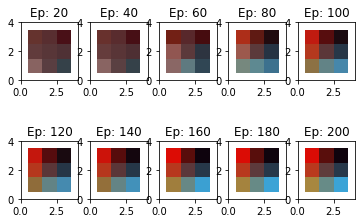

In [7]:
agri_som.train(trunc_data.values,
          num_epochs=200,
          init_learning_rate=0.01
          )

Notice: 

- after 60 Epochs, the network changed from random colors (initialization) to nearly constant color; this means that initial neighbourhood is large, so each neuron’s weight are being adjusted according to data.

- Slowly, the network develops different color according to input data structures/patterns, but, you can notice similar colors are neighbors to one another.

- Since there was a random initialization, the positions of colors may change but the topology will be preserved.

## Prediction and Analysis

In [8]:
def predict(df):
    bmu, bmu_idx = agri_som.find_bmu(df.values)
    df['bmu'] = bmu
    df['bmu_idx'] = bmu_idx
    return df
clustered_df = trunc_data.apply(predict, axis=1)
clustered_df.iloc[0:10]

,Area,Production,Yield,bmu,bmu_idx
0,0.671221,0.035365,0.016336,"[[0.8598475069437269, 0.048163281778187496, 0....","[0, 2]"
37,0.677518,0.552887,0.253177,"[[0.6563473194582374, 0.5291453980114298, 0.24...","[0, 0]"
97,0.064407,0.006542,0.031504,"[[0.05950935498515565, 0.013574388271143831, 0...","[2, 2]"
80,0.312332,0.946083,0.939802,"[[0.23007883447609487, 0.6442141411385391, 0.8...","[2, 0]"
8,0.867725,0.039430,0.014099,"[[0.8598475069437269, 0.048163281778187496, 0....","[0, 2]"
86,0.104186,0.009870,0.029391,"[[0.05950935498515565, 0.013574388271143831, 0...","[2, 2]"
88,0.071176,0.007417,0.032325,"[[0.05950935498515565, 0.013574388271143831, 0...","[2, 2]"
62,0.015770,0.001269,0.024965,"[[0.05950935498515565, 0.013574388271143831, 0...","[2, 2]"
75,0.243450,0.685703,0.873884,"[[0.23007883447609487, 0.6442141411385391, 0.8...","[2, 0]"
7,0.811694,0.036968,0.014123,"[[0.8598475069437269, 0.048163281778187496, 0....","[0, 2]"


Now, joininig the labelled initial data

In [9]:
joined_df = agri_data.join(clustered_df, rsuffix="_norm")
joined_df[0:10]

,Year AD,Year BS,Crop,Area,Production,Yield,Area_norm,Production_norm,Yield_norm,bmu,bmu_idx
0,1984/85,2041/42,OILSEED,127820,84030,657,0.671221,0.035365,0.016336,"[[0.8598475069437269, 0.048163281778187496, 0....","[0, 2]"
37,2000/2001,2057/58,POTATO,129019,1313717,10182,0.677518,0.552887,0.253177,"[[0.6563473194582374, 0.5291453980114298, 0.24...","[0, 0]"
97,1997/98,2054/55,JUTE,12265,15545,1267,0.064407,0.006542,0.031504,"[[0.05950935498515565, 0.013574388271143831, 0...","[2, 2]"
80,2001/2002,2058/59,SUGARCANE,59477,2247990,37796,0.312332,0.946083,0.939802,"[[0.23007883447609487, 0.6442141411385391, 0.8...","[2, 0]"
8,1992/93,2049/50,OILSEED,165240,93690,567,0.867725,0.039430,0.014099,"[[0.8598475069437269, 0.048163281778187496, 0....","[0, 2]"
86,1986/87,2043/44,JUTE,19840,23452,1182,0.104186,0.009870,0.029391,"[[0.05950935498515565, 0.013574388271143831, 0...","[2, 2]"
88,1988/89,2045/46,JUTE,13554,17624,1300,0.071176,0.007417,0.032325,"[[0.05950935498515565, 0.013574388271143831, 0...","[2, 2]"
62,2004/2005,2061/62,TOBACCO,3003,3016,1004,0.015770,0.001269,0.024965,"[[0.05950935498515565, 0.013574388271143831, 0...","[2, 2]"
75,1996/97,2053/54,SUGARCANE,46360,1629300,35145,0.243450,0.685703,0.873884,"[[0.23007883447609487, 0.6442141411385391, 0.8...","[2, 0]"
7,1991/92,2048/49,OILSEED,154570,87840,568,0.811694,0.036968,0.014123,"[[0.8598475069437269, 0.048163281778187496, 0....","[0, 2]"


Visualize how the original data gets clustered in the SOM

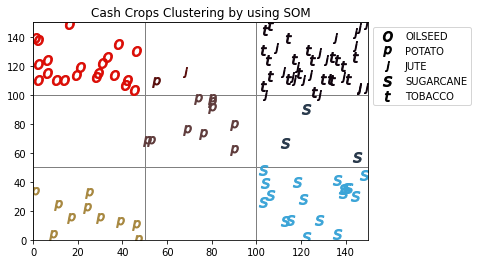

In [10]:
from matplotlib import pyplot as plt
from matplotlib import patches as patches
import matplotlib.lines as mlines

fig = plt.figure()
# setup axes
ax = fig.add_subplot(111)
scale = 50
ax.set_xlim((0, agri_som.net.shape[0]*scale))
ax.set_ylim((0, agri_som.net.shape[1]*scale))
ax.set_title("Cash Crops Clustering by using SOM")

for x in range(0, agri_som.net.shape[0]):
    for y in range(0, agri_som.net.shape[1]):
        ax.add_patch(patches.Rectangle((x*scale, y*scale), scale, scale,
                     facecolor='white',
                     edgecolor='grey'))
legend_map = {}
        
for index, row in joined_df.iterrows():
    x_cor = row['bmu_idx'][0] * scale
    y_cor = row['bmu_idx'][1] * scale
    x_cor = np.random.randint(x_cor, x_cor + scale)
    y_cor = np.random.randint(y_cor, y_cor + scale)
    color = row['bmu'][0]
    marker = "$\\ " + row['Crop'][0]+"$"
    marker = marker.lower()
    ax.plot(x_cor, y_cor, color=color, marker=marker, markersize=10)
    label = row['Crop']
    if not label in legend_map:
        legend_map[label] =  mlines.Line2D([], [], color='black', marker=marker, linestyle='None',
                          markersize=10, label=label)
plt.legend(handles=list(legend_map.values()), bbox_to_anchor=(1, 1))
plt.show()

In [11]:
dataT = trunc_data[data['Crop']=='TOBACCO']
print(dataT)

        Area  Production     Yield
62  0.015770    0.001269  0.024965
43  0.045581    0.001970  0.013402
56  0.023221    0.001646  0.021981
49  0.034238    0.002527  0.022901
55  0.025579    0.001618  0.019619
47  0.039962    0.002778  0.021558
46  0.038334    0.002264  0.018326
53  0.032190    0.002319  0.022354
45  0.033976    0.001877  0.017132
42  0.044899    0.002706  0.018699
44  0.046316    0.002058  0.013775
60  0.018889    0.001456  0.023920
52  0.031655    0.002292  0.022478
61  0.017844    0.001393  0.024219
57  0.022491    0.001603  0.022105
59  0.020023    0.001584  0.024542
54  0.029775    0.001885  0.019643
51  0.035404    0.002619  0.022950
58  0.022192    0.001672  0.023373
48  0.038282    0.002938  0.023796
50  0.034974    0.002534  0.022478


C:\Users\iCETEE\AppData\Local\Temp\ipykernel_8852\2686195632.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dataT = trunc_data[data['Crop']=='TOBACCO']


In [12]:
print(dataT.max())

Area          0.046316
Production    0.002938
Yield         0.024965
dtype: float64


In [13]:
dataT = trunc_data[data['Crop']=='JUTE']
print(dataT.min())

Area          0.047262
Production    0.004209
Yield         0.025959
dtype: float64


C:\Users\iCETEE\AppData\Local\Temp\ipykernel_8852\3067265762.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dataT = trunc_data[data['Crop']=='JUTE']


In [14]:
print(dataT.mean())

Area          0.077544
Production    0.007860
Yield         0.031578
dtype: float64
